Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
!pip install -U -q PyDrive

In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
# loading the dataset to a Pandas DataFrame
link =  'https://drive.google.com/file/d/1y2g5lIU9bLcDBoafJXD9ORKQoAm4hCqj/view?usp=sharing'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('primary_account(2).csv')

credit_card_data = pd.read_csv('primary_account(2).csv', sep = ',')


Exploratory Data Analysis
> Bloc en retrait



In [7]:
credit_card_data.describe()

,id,amount,available_balance,primary_account_id,Class
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,37.736842,49.368421,3720.105263,10.210526,0.210526
std,14.328845,50.993693,3001.704495,11.291978,0.418854
min,15.000000,5.000000,10.000000,1.000000,0.000000
25%,25.500000,10.000000,967.500000,2.000000,0.000000
50%,39.000000,10.000000,6391.000000,11.000000,0.000000
75%,47.500000,83.500000,6461.000000,11.000000,0.000000
max,61.000000,170.000000,6547.000000,53.000000,1.000000


In [8]:
credit_card_data.shape

(19, 5)

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,id,amount,available_balance,primary_account_id,Class
0,15,133,1000.0,11,0
1,17,10,990.0,11,1
2,19,170,6545.0,11,0
3,21,10,6535.0,11,1
4,23,100,6435.0,11,0


In [ ]:
credit_card_data.tail()

,id,amount,available_balance,primary_account_id,Class
14,48,5,20.0,1,1
15,49,100,1000.0,53,0
16,57,10,935.0,2,0
17,59,10,6537.0,11,0
18,61,10,10.0,1,0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19 non-null     int64  
 1   amount              19 non-null     int64  
 2   available_balance   19 non-null     float64
 3   primary_account_id  19 non-null     int64  
 4   Class               19 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 888.0 bytes


In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

id                    0
amount                0
available_balance     0
primary_account_id    0
Class                 0
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    15
1     4
Name: Class, dtype: int64

# DATA PREPROCESSING

In [ ]:
credit_card_data.dtypes == object
# Checking for Character Data Type

id                    False
amount                False
available_balance     False
primary_account_id    False
Class                 False
dtype: bool

In [ ]:
credit_card_data.columns



id                    0
amount                0
available_balance     0
primary_account_id    0
Class                 0
dtype: int64

In [ ]:
credit_card_data.std()

id                      14.328845
amount                  50.993693
available_balance     3001.704495
primary_account_id      11.291978
Class                    0.418854
dtype: float64

In [ ]:
credit_card_data.isnull().sum()

id                    0
amount                0
available_balance     0
primary_account_id    0
Class                 0
dtype: int64

In [ ]:
credit_card_data["Class"].value_counts()

0    15
1     4
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


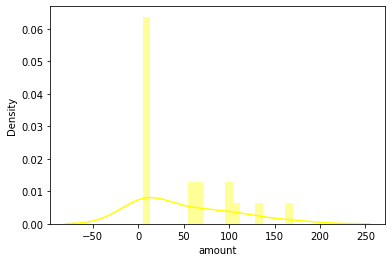

In [13]:
import seaborn as sns
sns.distplot(credit_card_data["amount"], bins = 20 , color = "yellow")
sns.set(style = "white")

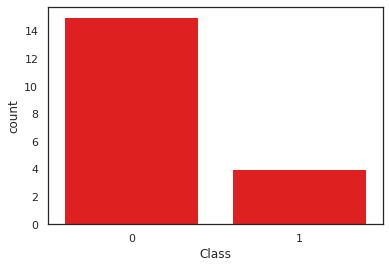

In [15]:
sns.countplot(x= "Class", data = credit_card_data, color = "red")
#checking for imbalance on the dependent Variables 

Standardization of Continuous Variables

In [ ]:
from sklearn import preprocessing 
 

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [23]:
# separating the data for analysis  Splitting up the data
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [24]:
print(legit.shape)
print(fraud.shape)

(15, 5)
(4, 5)


In [25]:
# statistical measures of the data
legit.amount.describe()

count     15.000000
mean      56.400000
std       53.908388
min        5.000000
25%       10.000000
50%       55.000000
75%      100.000000
max      170.000000
Name: amount, dtype: float64

In [26]:
fraud.amount.describe()

count     4.000000
mean     23.000000
std      29.427878
min       5.000000
25%       8.750000
50%      10.000000
75%      24.250000
max      67.000000
Name: amount, dtype: float64

In [27]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,id,amount,available_balance,primary_account_id
Class,,,,
0,39.60,56.4,3782.533333,10.666667
1,30.75,23.0,3486.000000,8.500000


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [20]:
legit_sample = legit.sample(n=492)

NameError: ignored

Concatenating two DataFrames

In [28]:
new_dataset = pd.concat([legit, fraud], axis=0)

In [ ]:
new_dataset.head()

,id,amount,available_balance,primary_account_id,Class
0,15,133,1000.0,11,0
2,19,170,6545.0,11,0
4,23,100,6435.0,11,0
5,28,55,6446.0,11,0
6,33,10,6456.0,11,0


In [ ]:
new_dataset.tail()

,id,amount,available_balance,primary_account_id,Class
18,61,10,10.0,1,0
1,17,10,990.0,11,1
3,21,10,6535.0,11,1
8,37,67,6399.0,11,1
14,48,5,20.0,1,1


In [29]:
new_dataset['Class'].value_counts()

0    15
1     4
Name: Class, dtype: int64

In [30]:
new_dataset.groupby('Class').mean()

,id,amount,available_balance,primary_account_id
Class,,,,
0,39.60,56.4,3782.533333,10.666667
1,30.75,23.0,3486.000000,8.500000


Splitting the data into Features & Targets

In [31]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']


In [32]:
print(X)

    id  amount  available_balance  primary_account_id
0   15     133             1000.0                  11
2   19     170             6545.0                  11
4   23     100             6435.0                  11
5   28      55             6446.0                  11
6   33      10             6456.0                  11
7   35      10             6466.0                  11
9   39       8             6391.0                  11
10  41      66             6547.0                  11
11  43     104             1000.0                   2
12  45      55              945.0                   2
13  47       5               25.0                   1
15  49     100             1000.0                  53
16  57      10              935.0                   2
17  59      10             6537.0                  11
18  61      10               10.0                   1
1   17      10              990.0                  11
3   21      10             6535.0                  11
8   37      67             6

In [ ]:
print(Y)

0     0
2     0
4     0
5     0
6     0
7     0
9     0
10    0
11    0
12    0
13    0
15    0
16    0
17    0
18    0
1     1
3     1
8     1
14    1
Name: Class, dtype: int64


Split the data into Training data & Testing Data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(19, 4) (15, 4) (4, 4)


Model Training

Logistic Regression

In [35]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
model = LogisticRegression()

In [38]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

Accuracy Score

In [39]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8666666666666667


In [64]:
# accuracy on test data
pred_Y_lr = model.predict(X_test)
test_data_accuracy = accuracy_score(pred_Y_lr, Y_test)

In [65]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.75


In [66]:
pred_Y_lr_proba = model.predict_proba(X_train)

In [67]:
lr_proba = pred_Y_lr_proba[:,1]

In [68]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table2 = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.2):
    y_pred = (pred_Y_lr_proba [:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train,y_pred).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table2.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [ ]:
table2

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.0,0.200000,1.000000,0.00,0.2,1.000000,0.333333
0.2,0.733333,0.666667,0.75,0.4,0.666667,0.500000
0.4,0.866667,0.333333,1.00,1.0,0.333333,0.500000
0.6,0.866667,0.333333,1.00,1.0,0.333333,0.500000
0.8,0.800000,0.000000,1.00,NaN,0.000000,NaN


In [47]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.75



continuité video 3


In [48]:
y_pred = np.array(model.predict(X_test))
y = np.array(Y_test )

In [49]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [50]:
print(confusion_matrix(Y_test,y_pred))

[[3 0]
 [1 0]]


In [52]:
    print("Accuracy Score :")
    print(accuracy_score(Y_test,y_pred))
    print("Classification Report :")
    print(classification_report(Y_test,y_pred))

Accuracy Score :
0.75
Classification Report :
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

